# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Crypto Taxes: Bitcoin Investors Get An Additional Month To File From IRS.  Bitcoin and other crypto assets are in a bull market, and anyone who bought in during 2020 is in some serious profit for the tax year. Lucky for them, however, is that the IRS has extended the tax filing deadline in the United States, giving investors a bit more time to get their statements reconciled, [&#8230;] ... [| Skaityti daugiau](https://www.newsbtc.com/news/bitcoin/crypto-taxes-bitcoin-investors-irs/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Vaccines could prevent asymptomatic infection. Here's why that's key to ending the pandemic..  Encouraging signs have emerged that Covid-19 vaccines protect against asymptomatic infections, a factor that scientists say is crucial to ending the pandemic. ... [| Skaityti daugiau](https://www.nbcnews.com/science/science-news/vaccines-prevent-asymptomatic-infection-key-ending-pandemic-rcna444) 

### Kainų kaita pandemijos metu

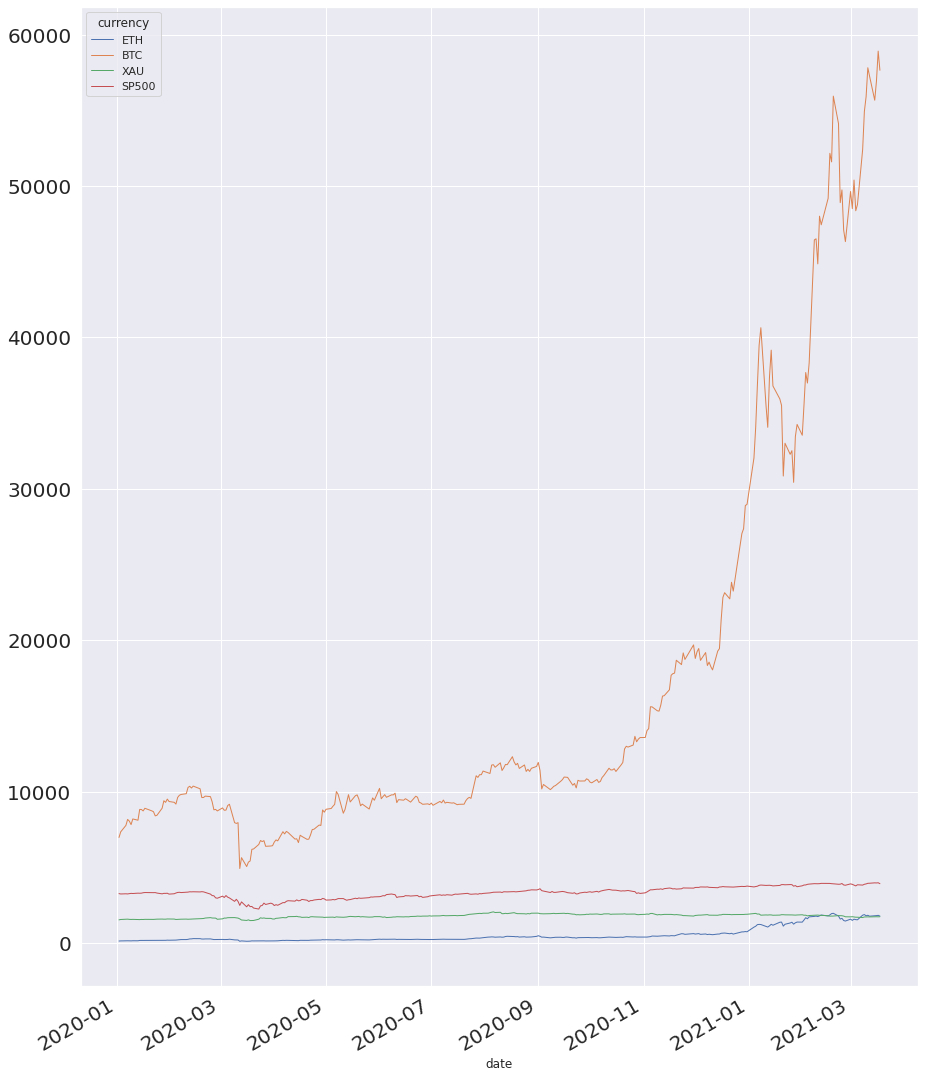

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.983623,0.234357,0.776203
BTC,0.983623,1.000000,0.178904,0.768694
XAU,0.234357,0.178904,1.000000,0.477310
SP500,0.776203,0.768694,0.477310,1.000000


In [8]:
#hide ### Koreliacijos matrica.

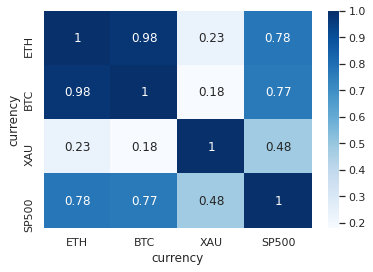

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')